In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# default_exp eda

# 赛题说明
https://tianchi.aliyun.com/competition/entrance/531824/introduction


## 赛程
### 初赛（2020年9月21日-10月21日）
3、初赛截止后（10月21日20：00最后一次测评），组委会将进行排名前100名参赛队伍的入围审核，前100名团队将需要提交代码进行审核，组委会将按照比赛规则要求识别人工标注、代码高度重合、直接使用开源代码的队伍，无实际算法贡献，并终止上述团队参赛，晋级空缺名额后补。最终50个队伍进入复赛环节。
### 复赛（2020年10月22日-11月6日）
1、复赛阶段测试数据不可见且不可下载，采用docker镜像的方式进行提交，容器镜像提交说明复赛公布。由选手提交打包好的代码镜像来运行得出预测结果，并对时间复杂度有限制，代码镜像运行时间不能超过4个小时，第一次接触docker可直达教程（链接）。

2、系统每天提供2次测评机会，排行榜按照评测指标从高到低进行排序，排行更新时间为10：00、20：00。排行榜将选择参赛队伍在本阶段的历史最优成绩进行排名展示。最后一次测评时间为11月6日20：00。

3、复赛结束，主办方将对TOP12团队分别进入代码审核。代码审核要求选手提交的代码结构清晰，根据说明可直接通过脚本重新完成模型的训练与推断，复现比赛成绩，复现时间要求不能超过4个小时。复赛代码审核通过的TOP6的参赛队伍选手代表将分别受邀参加决赛。

### 决赛答辩（2020年11月）

1、决赛将以现场线下答辩会的形式进行，地点在江西南昌，晋级决赛团队需提前准备答辩材料，包括答辩PPT（不少于10页）、参赛总结材料WORD（不少于3页）、算法核心代码。

2、决赛将邀请每支队伍至多3位代表参加，由组委会承担差旅费用。具体安排另行通知。3、答辩现场，评委将根据选手的思路和理论深度、创新性和应用价值、现场表现进行综合评分。4、最终的决赛分数将根据参赛队伍的复赛的线上成绩和答辩成绩加权得出，其中复赛线上成绩占比60%，答辩占比40%。依据决赛分数评选出大赛奖项并举行隆重颁奖，要求全部选手出席颁奖仪式。
## 数据说明
本次标注数据源来自中药药品说明书，
* 共包含1997份去重后的药品说明书，
* 其中1000份用于训练数据，
* 500份用作初赛测试数据，
* 剩余的497份用作复赛的测试数据。

本次复赛测试数据不对外开放，不可下载且不可见，选手需要在天池平台通过镜像方式提交。

共定义了13类实体，具体类别定义如下：

### 药品(DRUG):
中药名称，指在中医理论指导下，用于预防、治疗、诊断疾病并具有康复与保健作用的物质。中药主要来源于天然药及其加工品，包括植物药、动物药、矿物药及部分化学、生物制品类药物。例子: 六味地黄丸、逍遥散
### 药物成分(DRUG_INGREDIENT): 
中药组成成分，指中药复方中所含有的所有与该复方临床应用目的密切相关的药理活性成分。例子:当归、人参、枸杞
### 疾病(DISEASE): 
疾病名称，指人体在一定原因的损害性作用下，因自稳调节紊乱而发生的异常生命活动过程，是特定的异常病理情形，而且会影响生物体的部分或是所有器官。通常解释为“身体病况”（medical condition），而且伴随着特定的症状及医学征象。例子：高血压、心绞痛、糖尿病
### 症状(SYMPTOM): 
指疾病过程中机体内的一系列机能、代谢和形态结构异常变化所引起的病人主观上的异常感觉或某些客观病态改变。例子_：头晕、心悸、小腹胀痛_
### 证候(SYNDROME): 
中医学专用术语，概括为一系列有相互关联的症状总称，即通过望、闻、问、切四诊所获知的疾病过程中表现在整体层次上的机体反应状态及其运动、变化，简称证或者候，是指不同症状和体征的综合表现，单一的症状和体征无法表现一个完整的证候。 例子：血瘀、气滞、气血不足、气血两虚
### 疾病分组(DISEASE_GROUP): 
疾病涉及有人体组织部位的疾病名称的统称概念，非某项具体医学疾病。例子：肾病、肝病、肺病
### 食物(FOOD):
指能够满足机体正常生理和生化能量需求，并能延续正常寿命的物质。对人体而言，能够满足人的正常生活活动需求并利于寿命延长的物质称之为食物。例子：苹果、茶、木耳、萝卜
### 食物分组(FOOD_GROUP): 
中医中饮食养生中，将食物分为寒热温凉四性，同时中医药禁忌中对于具有某类共同属性食物的统称，记为食物分组。例子：油腻食物、辛辣食物、凉性食物
### 人群(PERSON_GROUP): 
中医药的适用及禁忌范围内相关特定人群。例子：孕妇、经期妇女、儿童、青春期少女
### 药品分组(DRUG_GROUP): 
具有某一类共同属性的药品类统称概念，非某项具体药品名。例子：止咳药、退烧药
### 药物剂型(DRUG_DOSAGE): 
药物在供给临床使用前，均必须制成适合于医疗和预防应用的形式，成为药物剂型。例子：浓缩丸、水蜜丸、糖衣片
### 药物性味(DRUG_TASTE): 
药品的性质和气味。例子：味甘、酸涩、气凉
### 中药功效(DRUG_EFFICACY): 
药品的主治功能和效果的统称，例子：滋阴补肾、去瘀生新、活血化瘀

## 提交方式

## 评估方式
本次挑战是标准的NER任务，以strict-F1作为衡量标准。

# 解题思路
## mine

## 大佬


# lib导入

In [2]:
# export
import os
from code.config import args 
from loguru import logger
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

from sklearn.metrics import classification_report, accuracy_score
# from mylib.utils.pickle import PickleWrapper

In [3]:
import sys
sys.path.append('..')
import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
from mylib.data.processing.eda import describe

# EDA

In [4]:
!ls {args.DATA_DIR}

round1_test.zip  round1_train.zip  test  train	Untitled.ipynb


## trainset

### 统计说明书样本的长度

In [5]:
dir_ = os.path.join(args.DATA_DIR, 'train/')
dir_

'../../../mydata/data_origin/cndrug_ner/train/'

In [6]:
content_length = []
for file in os.listdir(dir_):
    if not file.endswith(".txt"):  continue
    with open(dir_+file, "r", encoding="utf-8") as f:
        content_str = f.read()
        content_length.append(len(content_str))

In [7]:
len(content_length), min(content_length), np.percentile(content_length,95), max(content_length)

(1000, 17, 814.2499999999998, 3036)

findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial Unicode MS'] not found. Falling back to DejaVu Sans.


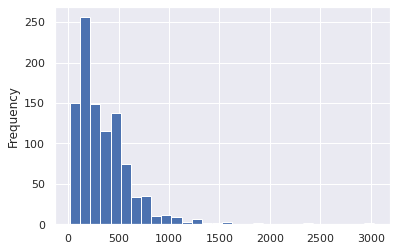

In [8]:
pd.Series(content_length).plot(kind='hist', bins=30)

### 标签分布

In [10]:
df = pd.DataFrame()
for file in os.listdir(dir_):
    if not file.endswith(".ann"):  
        pass
    else:
        dta = pd.read_csv(dir_+file, sep='\t', names=['id','entityInfo','entity'])
        dta['category'] = dta['entityInfo'].apply(lambda x:x.split(' ')[0])
        dta['pe1'] = dta['entityInfo'].apply(lambda x:x.split(' ')[1]).astype(int)
        dta['pe2'] = dta['entityInfo'].apply(lambda x:x.split(' ')[2]).astype(int)
        dta = dta[['id','entity','category','pe1','pe2']]       
        df = pd.concat([df,dta])

In [12]:
df.head(2)

,id,entity,category,pe1,pe2
0,T1,风寒骨痛,DRUG_EFFICACY,166,170
1,T2,跌打损伤,DRUG_EFFICACY,171,175


In [11]:
df.groupby("category").count().reset_index()[['category','id']].sort_values(by='id',ascending=False)

,category,id
11,SYMPTOM,6090
4,DRUG_EFFICACY,3257
10,PERSON_GROUP,1718
12,SYNDROME,1206
7,DRUG_TASTE,1133
0,DISEASE,1104
3,DRUG_DOSAGE,1016
6,DRUG_INGREDIENT,728
9,FOOD_GROUP,641
1,DISEASE_GROUP,623


In [13]:
df.groupby("entity").count().reset_index()[['entity','id']].sort_values(by='id',ascending=False)

,entity,id
780,孕妇,493
252,儿童,365
1311,月经不调,331
3087,过敏体质者,232
1853,生冷,224
...,...,...
1511,活动力差,1
1513,活络消肿,1
1516,活血养血,1
1520,活血化阏,1


## testset

In [14]:
test_dir = args.DATA_DIR+'test/'

In [16]:
content_length = []
for file in os.listdir(test_dir):
    if not file.endswith(".txt"):  
        pass
    else:
        with open(test_dir+file, "r", encoding="utf-8") as f:
            content_str = f.read()
            content_length.append(len(content_str))

In [19]:
content_length = pd.Series(content_length)

In [20]:
len(content_length), content_length[content_length>500].shape

(500, (65,))

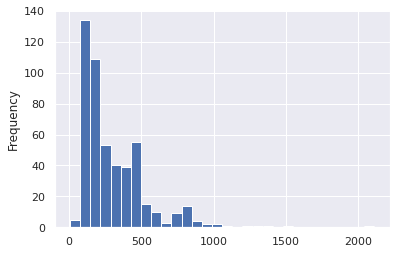

In [23]:
content_length.plot(kind='hist', bins=30)